In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
     

In [4]:
df= pd.read_csv(r"C:\Users\Harshal\Downloads\Social_Network_Ads.csv")


In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.drop(['User ID'],axis=1,inplace = True)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
df.Purchased.value_counts()


Purchased
0    257
1    143
Name: count, dtype: int64

In [12]:
df.Gender.value_counts()


Gender
Female    204
Male      196
Name: count, dtype: int64

In [13]:
df.Gender.value_counts()


Gender
Female    204
Male      196
Name: count, dtype: int64

In [14]:
df.isnull().sum()


Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

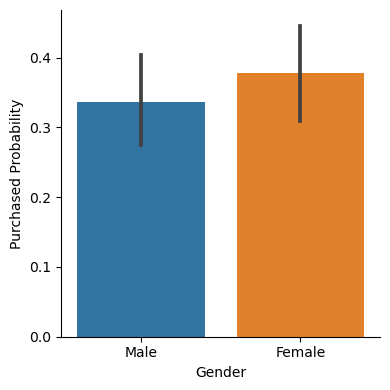

In [15]:
g = sns.catplot(x = "Gender",y = "Purchased",data = df,kind = "bar",height = 4)
g.set_ylabels("Purchased Probability")
plt.show
     

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


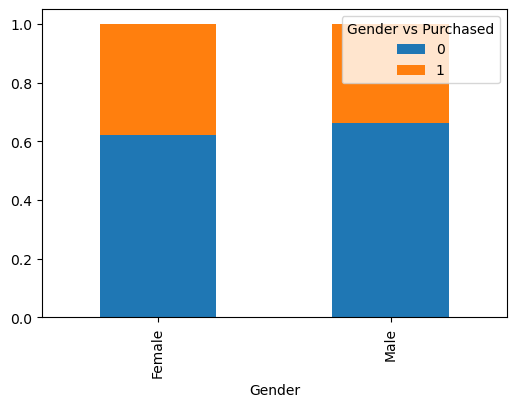

In [16]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize='index')
print(M2)
M2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

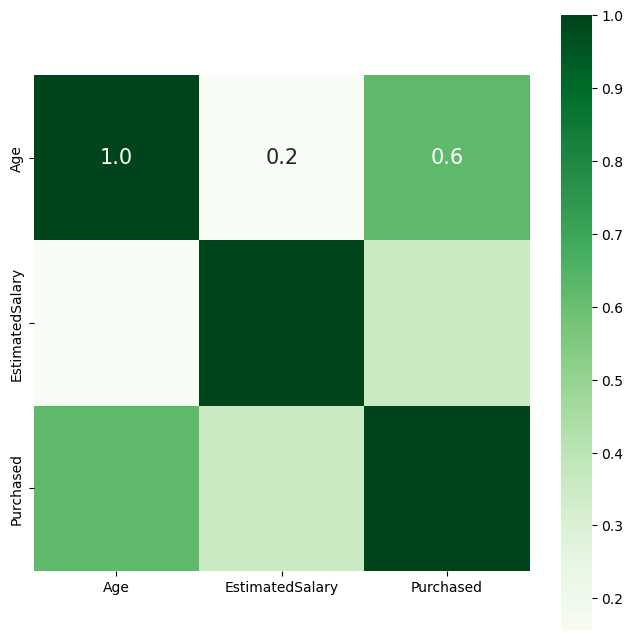

In [22]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Greens')
plt.show()

In [23]:
X=df.drop(['Gender','Purchased'],axis=1)
Y= df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print("Training and testing split was successful.")
     

Training and testing split was successful.


In [26]:
from sklearn.linear_model import LogisticRegression
basemodel= LogisticRegression()
basemodel.fit(X_train,y_train)
print("Training accuracy:", basemodel.score(X_train,y_train)*100)

Training accuracy: 64.0625


In [27]:
y_predict= basemodel.predict(X_test)
print("Testing accuracy:", basemodel.score(X_test,y_test)*100)

Testing accuracy: 65.0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [29]:
X=df[['Age','EstimatedSalary']]
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [30]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5


In [31]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_test,y_predict)
print(Acc)

0.875


In [32]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
print(cm)

[[51  1]
 [ 9 19]]


In [33]:
from sklearn.metrics import precision_recall_fscore_support
prf= precision_recall_fscore_support(y_test,y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.85 0.95]
Recall: [0.98076923 0.67857143]
fscore: [0.91071429 0.79166667]
support: [52 28]


In [34]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

